<div class="alert alert-info" role="alert">
    <h1 align = 'center'>Bike Sharing Demand</h1>
    <h2 align = 'center'>predict bike sharing demand with machine learning models</h2>
    <hr>
    <h3 align = 'center'>Mahtab Ezzati</h3>
</div>

# 1: Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 2: Load dateset

In [2]:
df = pd.read_csv('train.csv')
unseen_data = pd.read_csv('test.csv')

df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


# 3: EDA

In [3]:
df.shape

(10886, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [5]:
df.duplicated().sum()

0

<div class="alert alert-light" role="alert">
    <p align = 'center'>no missing value or duplicated value found</p>
</div>

In [6]:
df.columns  

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
df['datetime'] = pd.to_datetime(df['datetime'])
type(df['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_month'] = df['datetime'].dt.day
df['day_of_week'] = df['datetime'].dt.day_of_week
df['hour'] = df['datetime'].dt.hour
df.drop(['datetime', 'casual','registered'], axis = 1, inplace = True)

df.dtypes

season            int64
holiday           int64
workingday        int64
weather           int64
temp            float64
atemp           float64
humidity          int64
windspeed       float64
count             int64
year              int64
month             int64
day_of_month      int64
day_of_week       int64
hour              int64
dtype: object

In [10]:
df.nunique()

season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
count           822
year              2
month            12
day_of_month     19
day_of_week       7
hour             24
dtype: int64

In [11]:
cont_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
df[cont_columns].describe()

,temp,atemp,humidity,windspeed,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,191.574132
std,7.79159,8.474601,19.245033,8.164537,181.144454
min,0.82000,0.760000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,42.000000
50%,20.50000,24.240000,62.000000,12.998000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,284.000000
max,41.00000,45.455000,100.000000,56.996900,977.000000


In [12]:
df.groupby('season').sum()['count'].to_frame()

,count
season,
1,312498
2,588282
3,640662
4,544034


<div class="alert alert-light" role="alert">
    <p align = 'center'>most bicycles are used In the fall.</p>
</div>

In [13]:
pd.crosstab(df['season'], df['weather'], normalize = 0)

weather,1,2,3,4
season,,,,
1,0.654877,0.266195,0.078555,0.000372
2,0.658983,0.259056,0.081961,0.000000
3,0.706184,0.221003,0.072814,0.000000
4,0.622531,0.295172,0.082297,0.000000


<div class="alert alert-light" role="alert">
    <p align = 'center'>As we expected, more cyclists use bicycles in weather 1 (Clear, Few clouds, Partly cloudy, Partly cloudy ).</p>
</div>

In [14]:
df['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [15]:
corr = df.corr() 
corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day_of_month,day_of_week,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.004797,0.971524,0.001729,-0.010553,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,0.012021,0.001731,-0.015877,-0.191832,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.002482,-0.003394,0.009829,-0.704267,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.012548,0.012144,-0.007890,-0.047692,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.061226,0.257589,0.015551,-0.038466,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.058540,0.264173,0.011866,-0.040235,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.078606,0.204537,-0.011335,-0.026507,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.015221,-0.150192,0.036157,-0.024804,0.146631
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.260403,0.166862,0.019826,-0.002283,0.400601
year,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.260403,1.000000,-0.004932,0.001800,-0.003785,-0.004234


In [16]:
corr['count'].sort_values()

humidity       -0.317371
weather        -0.128655
holiday        -0.005393
day_of_week    -0.002283
workingday      0.011594
day_of_month    0.019826
windspeed       0.101369
season          0.163439
month           0.166862
year            0.260403
atemp           0.389784
temp            0.394454
hour            0.400601
count           1.000000
Name: count, dtype: float64

<AxesSubplot:>

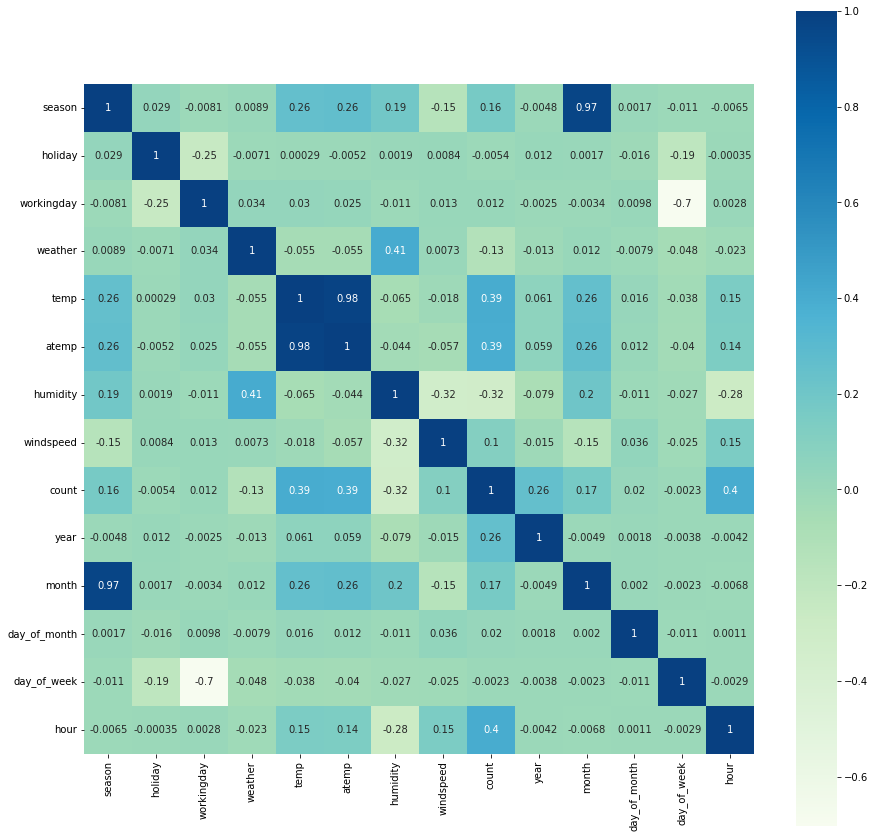

In [17]:
plt.figure(figsize = (15, 15))
sns.heatmap(corr, annot =True, square= True,cmap = 'GnBu')

# 4: Data preprocessing

#### 4.1: split data to train and test set

In [18]:
x = df.drop('count', axis = 1)
y = df['count']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print('x train :', x_train.shape,'\t\tx test :', x_test.shape)
print('y train :', y_train.shape,'\t\ty test :', y_test.shape)

x train : (8708, 13) 		x test : (2178, 13)
y train : (8708,) 		y test : (2178,)


In [19]:
y_test = y_test.values

#### 4.2: feature scaling

In [20]:
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# 5: Strorytelling - Visualization

Text(0.5, 1.0, 'boxplot for each day')

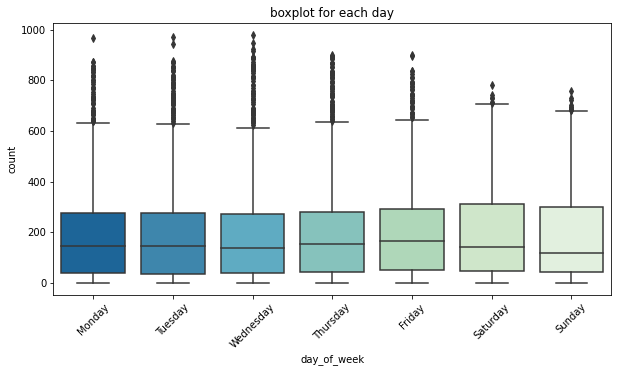

In [22]:
plt.figure(figsize= (10, 5))
bp1 = sns.boxplot(y ='count', x = 'day_of_week' ,data = df, palette = 'GnBu_r')
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bp1.set_xticklabels(day_of_week, rotation = 45)
plt.title('boxplot for each day')

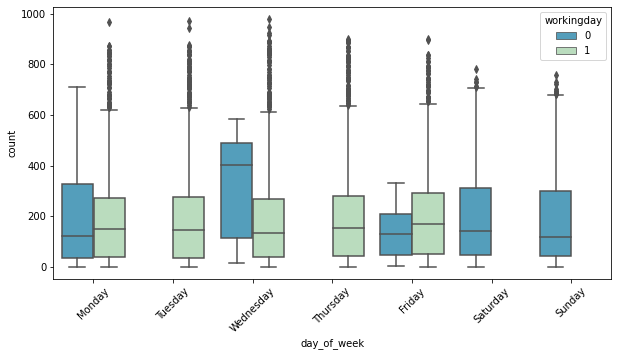

In [23]:
plt.figure(figsize= (10, 5))
ax = sns.boxplot(y ='count', x = 'day_of_week', hue = 'workingday' ,data = df, palette = 'GnBu_r')
_ = ax.set_xticklabels(day_of_week, rotation = 45)

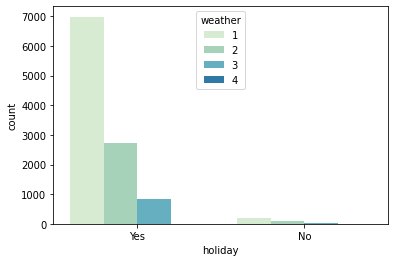

In [24]:
cntplt = sns.countplot(data = df, x = 'holiday', palette = 'GnBu' , hue = 'weather')
_ = cntplt.set_xticklabels(labels = ['Yes', 'No'])

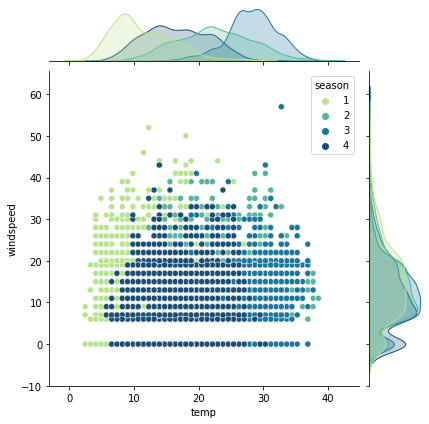

In [25]:
palette1 = ['#b5e48c','#52b69a', '#1a759f', '#184e77']
sns.jointplot(data = df[df['year'] == 2011], x = 'temp', y = 'windspeed', hue = 'season', palette = palette1)

<AxesSubplot:xlabel='hour'>

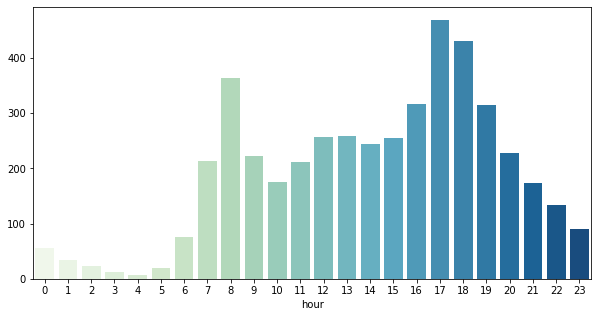

In [26]:
count_hour = df.groupby('hour').mean()['count']

plt.figure(figsize = (10, 5))
sns.barplot(x = count_hour.index, y = count_hour.values , palette = 'GnBu')

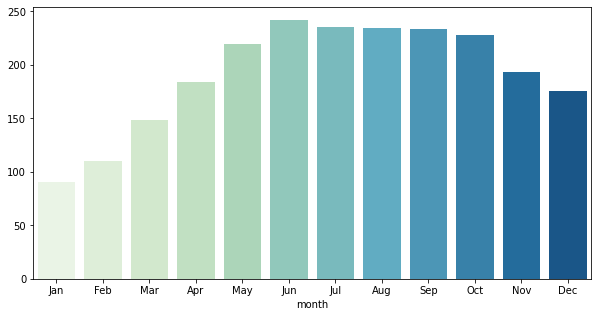

In [27]:
count_month = df.groupby('month').mean()['count']

plt.figure(figsize = (10, 5))
brplt = sns.barplot(x = count_month.index, y = count_month.values , palette = 'GnBu')
a = brplt.set_xticklabels(labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

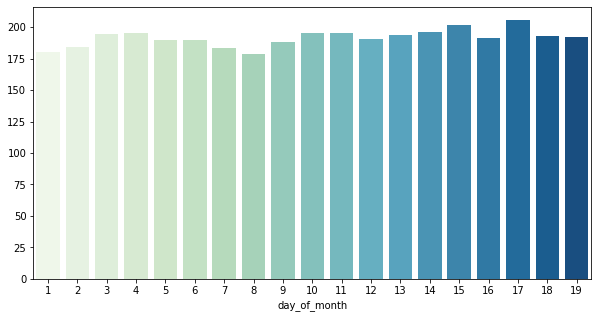

In [28]:
count_dayofmonth = df.groupby('day_of_month').mean()['count']
count_dayofmonth
plt.figure(figsize = (10, 5))
brplt = sns.barplot(x = count_dayofmonth.index, y = count_dayofmonth.values , palette = 'GnBu')

# 6: Train your model (Regression)

In [29]:
def drawGraph(ytest, ypred, limit, title):
    plt.figure(figsize= (10, 5))
    plt.plot(y_test[:limit], color = palette1[1])
    plt.plot(y_pred[:limit], color = palette1[2])
    plt.title(title)
    plt.legend(['test set', 'predicted'])

In [30]:
mt = pd.DataFrame(columns = ['model name', 'MAE', 'MSE','R2', 'ME'])

def modelsTabel(modelName, mae, mse, r2s, me):
    mt.loc[len(mt.index)] = [modelName, mae, mse, r2s, me]

#### 6.1: Linear Regression

In [31]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [32]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2s = metrics.r2_score(y_test, y_pred)
me = metrics.max_error(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R^ 2 Score:', r2s)
print('Max Error:', me)

Mean Absolute Error: 108.11680098167591
Mean Squared Error: 21091.182012234713
R^ 2 Score: 0.38149268927526214
Max Error: 617.7816418125637


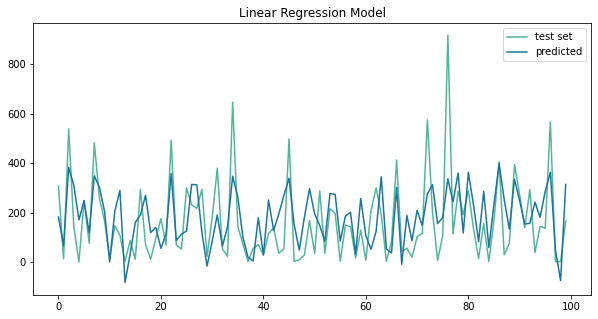

In [33]:
modelsTabel('Linear Regression', mae, mse, r2s, me)
drawGraph(y_test, y_pred, 100, 'Linear Regression Model')

#### 6.2: Polynomial Regression

In [34]:
poly = PolynomialFeatures(degree = 2)
x_train_qua = poly.fit_transform(x_train)
qua = LinearRegression()
qua.fit(x_train_qua, y_train)
y_pred = qua.predict(poly.fit_transform(x_test))

In [35]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2s = metrics.r2_score(y_test, y_pred)
me = metrics.max_error(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R^ 2 Score:', r2s)
print('Max Error:', me)

Mean Absolute Error: 91.89860250229569
Mean Squared Error: 15470.623061447213
R^ 2 Score: 0.5463178185356726
Max Error: 587.375


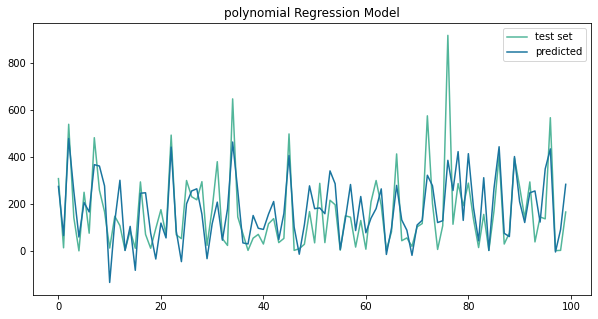

In [36]:
modelsTabel('polynomial Regression', mae, mse, r2s, me)
drawGraph(y_test, y_pred, 100, 'polynomial Regression Model')

#### 6.3: KNN

In [37]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [38]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2s = metrics.r2_score(y_test, y_pred)
me = metrics.max_error(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R^ 2 Score:', r2s)
print('Max Error:', me)

Mean Absolute Error: 81.85206611570247
Mean Squared Error: 15162.352782369146
R^ 2 Score: 0.5553579672185837
Max Error: 641.0


In [39]:
error_rate = []
for i in range(1, 15):
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(x_train, y_train)
    y_pred_i = knn.predict(x_test)
    error_rate.append(metrics.r2_score(y_test, y_pred_i))

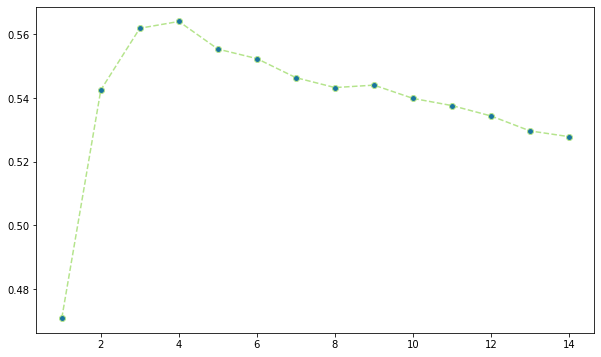

In [40]:
plt.figure(figsize = (10, 6))
a = plt.plot(range(1, len(error_rate)+1),error_rate ,color = palette1[0], linestyle = 'dashed', marker = 'o',markerfacecolor = palette1[2])

In [41]:
knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2s = metrics.r2_score(y_test, y_pred)
me = metrics.max_error(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R^ 2 Score:', r2s)
print('Max Error:', me)

Mean Absolute Error: 79.69926538108356
Mean Squared Error: 14866.497073002754
R^ 2 Score: 0.5640340537013904
Max Error: 608.75


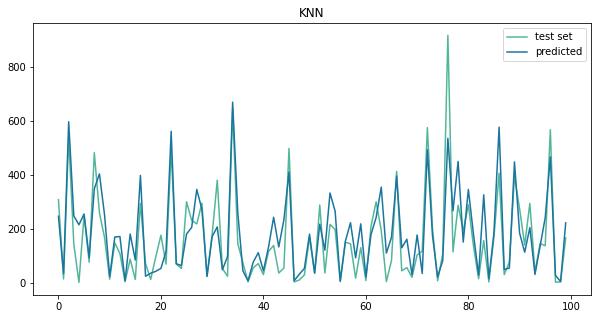

In [42]:
modelsTabel('KNN', mae, mse, r2s, me)
drawGraph(y_test, y_pred, 100, 'KNN')

#### 6.4: Decision Tree

In [43]:
dtr = DecisionTreeRegressor(random_state = 1)
dtr.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [44]:
y_pred = dtr.predict(x_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2s = metrics.r2_score(y_test, y_pred)
me = metrics.max_error(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R^ 2 Score:', r2s)
print('Max Error:', me)

Mean Absolute Error: 34.18778696051423
Mean Squared Error: 3440.5734618916435
R^ 2 Score: 0.8991038132414264
Max Error: 491.0


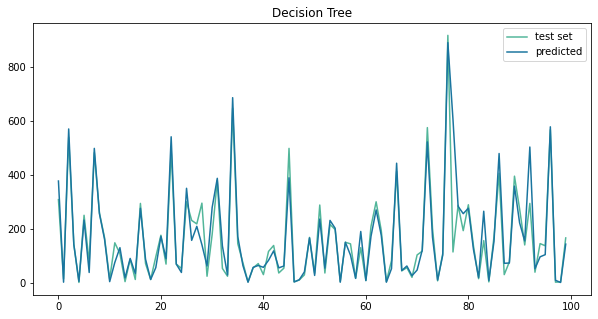

In [45]:
modelsTabel('Decision Tree', mae, mse, r2s, me)
drawGraph(y_test, y_pred, 100, 'Decision Tree')

#### 6.5: Random Forest

In [46]:
rfr = RandomForestRegressor(random_state = 1, n_estimators = 10)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)


In [47]:
print('R^ 2 Score:', r2s)

R^ 2 Score: 0.8991038132414264


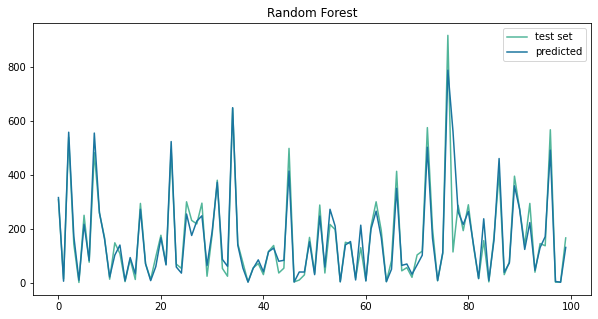

In [48]:
drawGraph(y_test, y_pred, 100, 'Random Forest')

In [49]:
# find best value for n_estimators
max = 0
index = -1
for i in range(10, 60):
    rfr = RandomForestRegressor(random_state = 1, n_estimators = i)
    rfr.fit(x_train, y_train)
    y_pred = rfr.predict(x_test)
    r2_score = metrics.r2_score(y_test, y_pred)
    if r2_score > max:
        index = i
        max = r2_score


In [50]:
rfr = RandomForestRegressor(random_state = 1, n_estimators = index)
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2s = metrics.r2_score(y_test, y_pred)
me = metrics.max_error(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R^ 2 Score:', r2s)
print('Max Error:', me)

Mean Absolute Error: 24.80242989333898
Mean Squared Error: 1635.0363614629348
R^ 2 Score: 0.9520519076513128
Max Error: 366.3076923076923


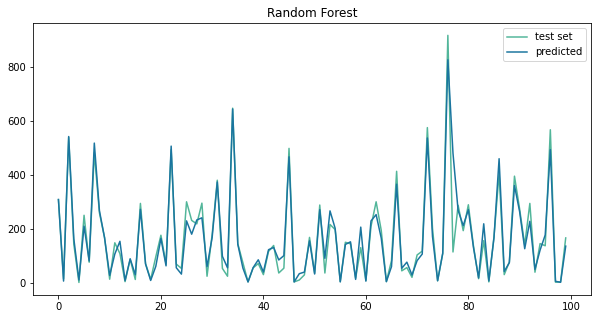

In [51]:
modelsTabel('Random Forest', mae, mse, r2s, me)
drawGraph(y_test, y_pred, 100, 'Random Forest')

In [52]:
mt

,model name,MAE,MSE,R2,ME
0,Linear Regression,108.116801,21091.182012,0.381493,617.781642
1,polynomial Regression,91.898603,15470.623061,0.546318,587.375000
2,KNN,79.699265,14866.497073,0.564034,608.750000
3,Decision Tree,34.187787,3440.573462,0.899104,491.000000
4,Random Forest,24.802430,1635.036361,0.952052,366.307692


<div class="alert alert-light" role="alert">
    <p align = 'center'>best model for this dataset is Random Forest.</p>
</div>

# 7: Predice Unseen Data

In [53]:
unseen_data['datetime'] = pd.to_datetime(unseen_data['datetime'])
times = unseen_data['datetime']

In [54]:
unseen_data['year'] = unseen_data['datetime'].dt.year
unseen_data['month'] = unseen_data['datetime'].dt.month
unseen_data['day_of_month'] = unseen_data['datetime'].dt.day
unseen_data['day_of_week'] = unseen_data['datetime'].dt.day_of_week
unseen_data['hour'] = unseen_data['datetime'].dt.hour

unseen_data.drop(['datetime'], axis = 1, inplace = True)
unseen_data.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day_of_month,day_of_week,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2


In [55]:
unseen_data = mms.transform(unseen_data)
unseen_data = sc.transform(unseen_data)
y_pred_unseen = rfr.predict(unseen_data)

In [56]:
Submission = pd.DataFrame({'datetime' : times, 'count' : y_pred_unseen})
Submission.set_index('datetime', inplace = True)
Submission.to_csv('Submission.csv')